In [28]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from statsmodels.tsa.arima_model import ARIMA


import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import plotly.express as px
import numpy as np 

In [29]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [30]:
apple_stock = yf.download('AAPL') 
apple_stock.drop(columns=['Open', 'High', 'Low', 'Close'], axis=1, inplace=True)
apple_stock.index = pd.to_datetime(apple_stock.index)
apple_stock = apple_stock[apple_stock.index > '2010-01-01']
apple_stock

[*********************100%%**********************]  1 of 1 completed


,Adj Close,Volume
Date,,
2010-01-04,6.470742,493729600
2010-01-05,6.481928,601904800
2010-01-06,6.378825,552160000
2010-01-07,6.367033,477131200
2010-01-08,6.409362,447610800
...,...,...
2024-06-11,207.149994,172373300
2024-06-12,213.070007,198134300
2024-06-13,214.240005,97862700


In [32]:
apple_stock.index = pd.to_datetime(apple_stock.index)
apple_stock

,Adj Close,Volume
Date,,
2010-01-04,6.470742,493729600
2010-01-05,6.481928,601904800
2010-01-06,6.378825,552160000
2010-01-07,6.367033,477131200
2010-01-08,6.409362,447610800
...,...,...
2024-06-11,207.149994,172373300
2024-06-12,213.070007,198134300
2024-06-13,214.240005,97862700


In [33]:
apple_stock['1-Day Return'] = apple_stock['Adj Close'].pct_change(1) * 100
apple_stock['5-Day Return'] = apple_stock['Adj Close'].pct_change(5) * 100
apple_stock['1-Month Return'] = apple_stock['Adj Close'].pct_change(21) * 100
apple_stock = apple_stock.dropna()

C:\Users\12436\AppData\Local\Temp\ipykernel_6184\713184757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_stock['1-Day Return'] = apple_stock['Adj Close'].pct_change(1) * 100
C:\Users\12436\AppData\Local\Temp\ipykernel_6184\713184757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_stock['5-Day Return'] = apple_stock['Adj Close'].pct_change(5) * 100
C:\Users\12436\AppData\Local\Temp\ipykernel_6184\713184757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

<Axes: xlabel='Date'>

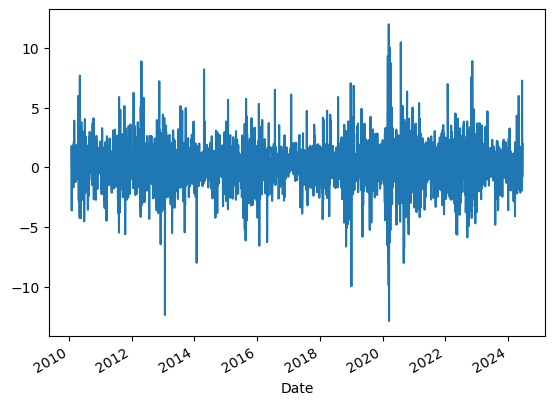

In [34]:
apple_stock['1-Day Return'].plot()

<Axes: xlabel='Date'>

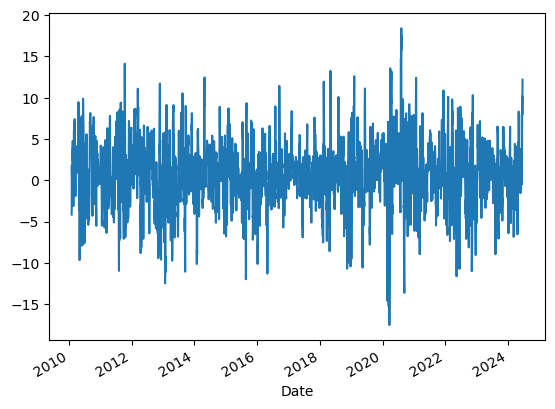

In [35]:
apple_stock['5-Day Return'].plot()

<Axes: xlabel='Date'>

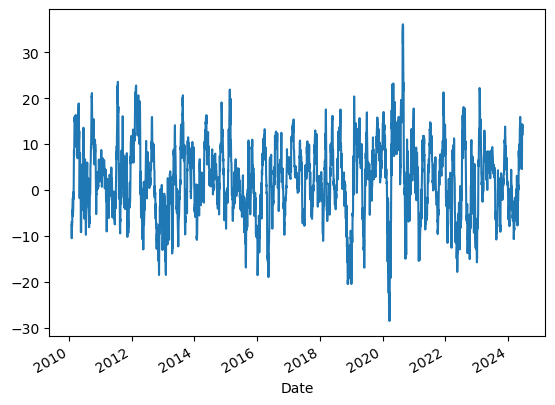

In [36]:
apple_stock['1-Month Return'].plot()

In [37]:
apple_stock

,Adj Close,Volume,1-Day Return,5-Day Return,1-Month Return
Date,,,,,
2010-02-03,6.023856,615328000,1.720594,-4.161081,-6.906257
2010-02-04,5.806766,757652000,-3.603848,-3.632888,-10.416073
2010-02-05,5.909869,850306800,1.775578,1.770271,-7.351754
2010-02-08,5.869353,478270800,-0.685571,-0.313275,-7.816523
2010-02-09,5.931941,632886800,1.066356,0.168488,-7.448811
...,...,...,...,...,...
2024-06-11,207.149994,172373300,7.264913,6.586050,13.165796
2024-06-12,213.070007,198134300,2.857839,8.781341,14.381581
2024-06-13,214.240005,97862700,0.549114,10.160433,14.304014


In [38]:
train = apple_stock[apple_stock.index <= '2024-01-01']
test = apple_stock[apple_stock.index > '2024-01-01']

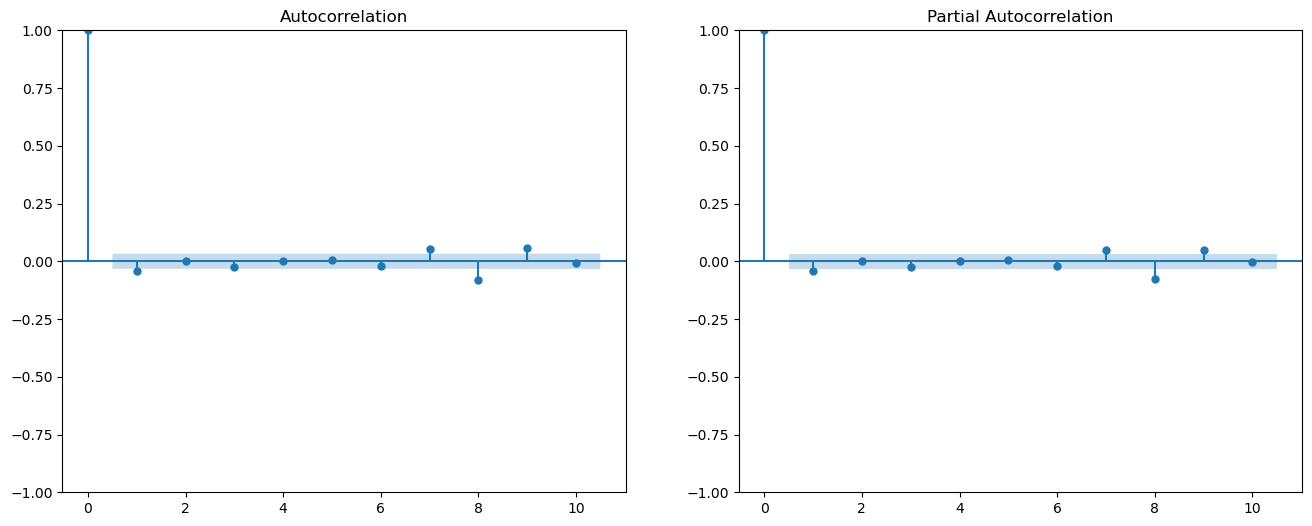

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(apple_stock['1-Day Return'], lags=10, ax=axes[0])
plot_pacf(apple_stock['1-Day Return'], lags=10, ax=axes[1])
plt.show()

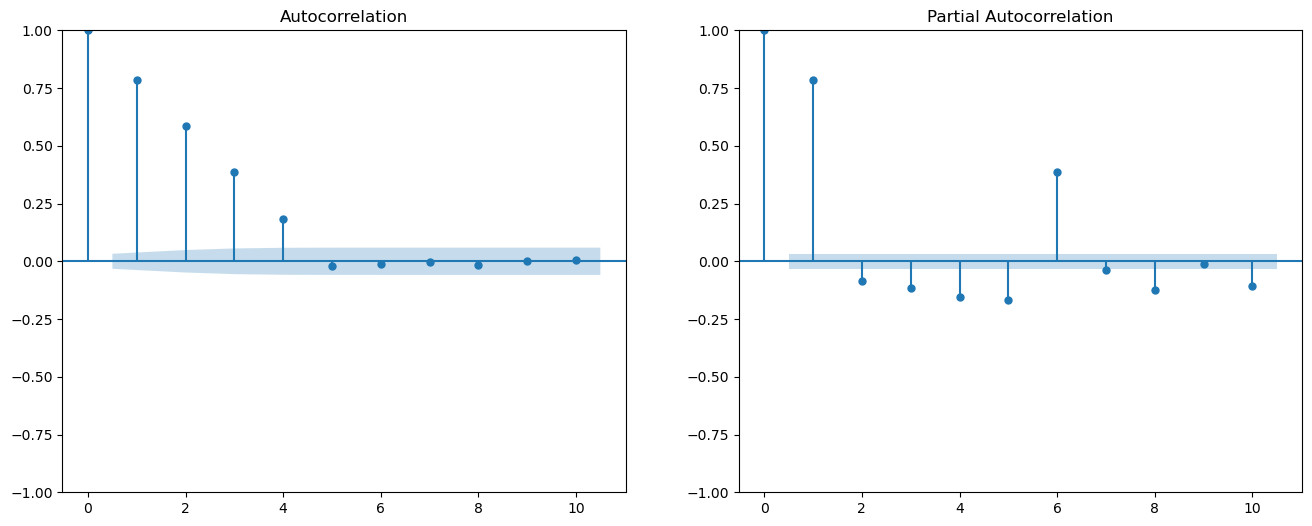

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(apple_stock['5-Day Return'], lags=10, ax=axes[0])
plot_pacf(apple_stock['5-Day Return'], lags=10, ax=axes[1])
plt.show()

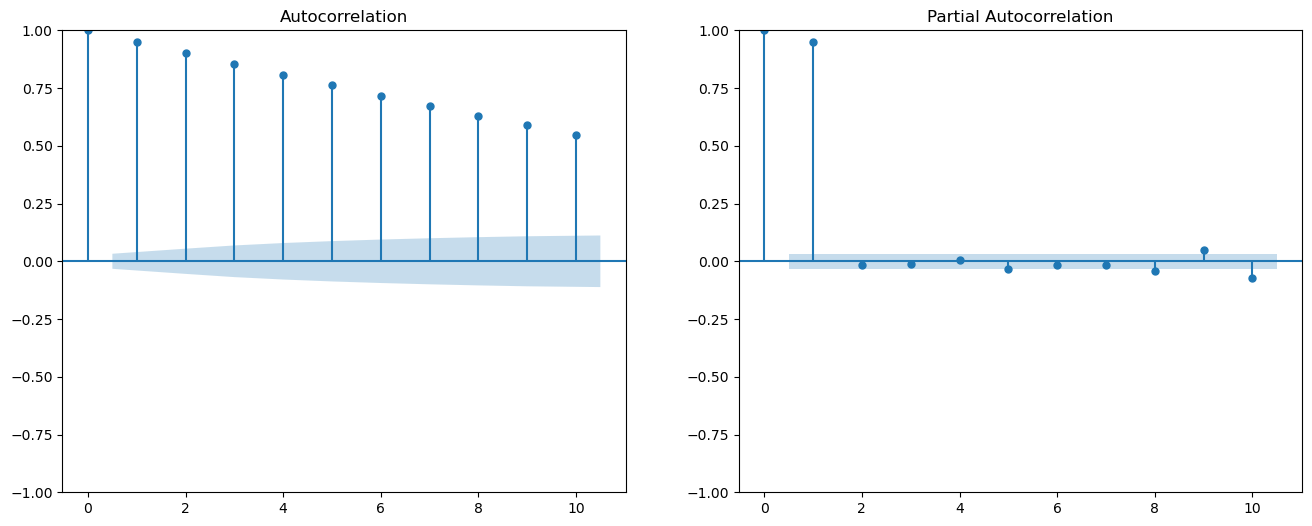

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(apple_stock['1-Month Return'], lags=10, ax=axes[0])
plot_pacf(apple_stock['1-Month Return'], lags=10, ax=axes[1])
plt.show()

In [42]:
train

,Adj Close,Volume,1-Day Return,5-Day Return,1-Month Return
Date,,,,,
2010-02-03,6.023856,615328000,1.720594,-4.161081,-6.906257
2010-02-04,5.806766,757652000,-3.603848,-3.632888,-10.416073
2010-02-05,5.909869,850306800,1.775578,1.770271,-7.351754
2010-02-08,5.869353,478270800,-0.685571,-0.313275,-7.816523
2010-02-09,5.931941,632886800,1.066356,0.168488,-7.448811
...,...,...,...,...,...
2023-12-22,193.353287,37122800,-0.554743,-2.009412,1.197017
2023-12-26,192.803986,28919300,-0.284092,-1.449785,1.621311
2023-12-27,192.903839,48087700,0.051790,-1.924452,1.770375


In [43]:
# 1 day return prediction 

model1 = ARIMA(train['1-Day Return'], order=(1, 0, 0))
model1_fit = model1.fit()
print(model1_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           1-Day Return   No. Observations:                 3501
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -6968.753
Date:                Tue, 18 Jun 2024   AIC                          13943.505
Time:                        12:52:50   BIC                          13961.987
Sample:                             0   HQIC                         13950.101
                               - 3501                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1152      0.029      3.988      0.000       0.059       0.172
ar.L1         -0.0452      0.011     -4.006      0.000      -0.067      -0.023
sigma2         3.1366      0.042     73.933      0.0

c:\Users\12436\.conda\envs\Capstones\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\12436\.conda\envs\Capstones\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\12436\.conda\envs\Capstones\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [55]:
history = [x for x in train['1-Day Return']] # Make the history as a list 
predictions = list()      # Make the prediction also as a list 

for t in range(len(test)):      # for every new point, we make a decision based on the available history 
    model = ARIMA(history, order=(1, 0, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test['1-Day Return'][t]
    history.append(obs)
    print(f'finish {t} round, {len(test)-t} left')

finish 0 round, 116 left
finish 1 round, 115 left
finish 2 round, 114 left
finish 3 round, 113 left
finish 4 round, 112 left
finish 5 round, 111 left
finish 6 round, 110 left
finish 7 round, 109 left
finish 8 round, 108 left
finish 9 round, 107 left
finish 10 round, 106 left
finish 11 round, 105 left
finish 12 round, 104 left
finish 13 round, 103 left
finish 14 round, 102 left
finish 15 round, 101 left
finish 16 round, 100 left
finish 17 round, 99 left
finish 18 round, 98 left
finish 19 round, 97 left
finish 20 round, 96 left
finish 21 round, 95 left
finish 22 round, 94 left
finish 23 round, 93 left
finish 24 round, 92 left
finish 25 round, 91 left
finish 26 round, 90 left
finish 27 round, 89 left
finish 28 round, 88 left
finish 29 round, 87 left
finish 30 round, 86 left
finish 31 round, 85 left
finish 32 round, 84 left
finish 33 round, 83 left
finish 34 round, 82 left
finish 35 round, 81 left
finish 36 round, 80 left
finish 37 round, 79 left
finish 38 round, 78 left
finish 39 round, 7

In [58]:
df1 = pd.DataFrame(data=predictions, index=test.index, columns=['predicted return difference compared with today'])

<Axes: xlabel='Date'>

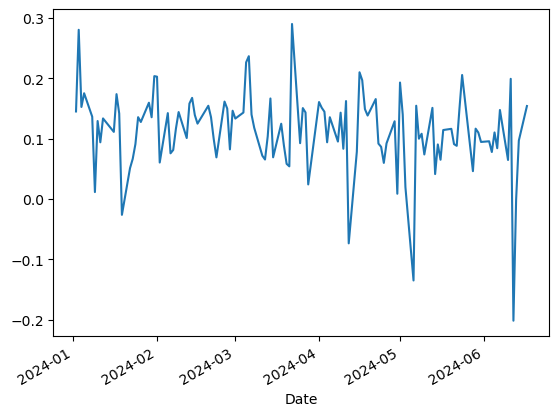

In [59]:
df1['predicted return difference compared with today'].plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


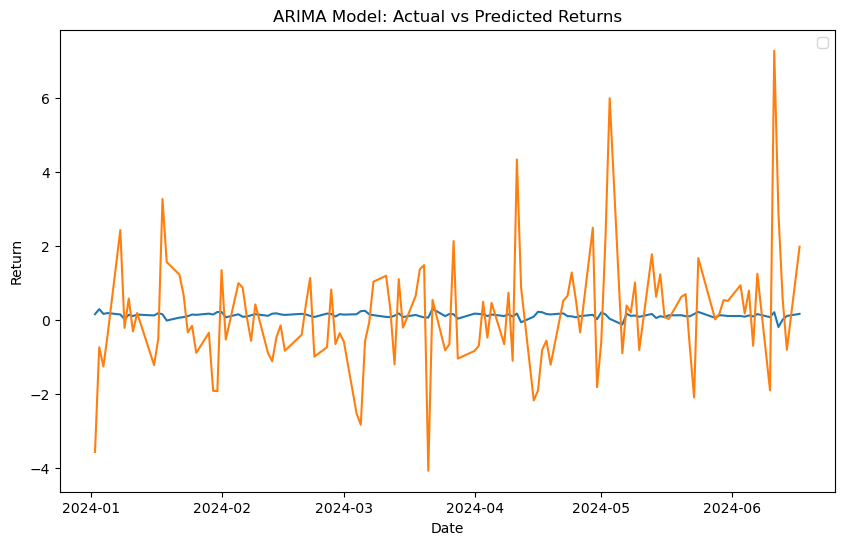

In [64]:
plt.figure(figsize = (10,6))

plt.plot(df1['predicted return difference compared with today'])
plt.plot(test['1-Day Return'])
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('ARIMA Model: Actual vs Predicted Returns')
plt.legend()
plt.show()

In [65]:
# 5-day return 
model5 = ARIMA(train['5-Day Return'], order=(2, 0, 0))
model5_fit = model5.fit()
print(model5_fit.summary())

c:\Users\12436\.conda\envs\Capstones\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\12436\.conda\envs\Capstones\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\12436\.conda\envs\Capstones\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           5-Day Return   No. Observations:                 3501
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -7952.937
Date:                Tue, 18 Jun 2024   AIC                          15913.874
Time:                        13:08:36   BIC                          15938.517
Sample:                             0   HQIC                         15922.669
                               - 3501                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5643      0.173      3.266      0.001       0.226       0.903
ar.L1          0.8548      0.013     66.024      0.000       0.829       0.880
ar.L2         -0.0875      0.013     -6.800      0.0

In [66]:
history = [x for x in train['5-Day Return']] # Make the history as a list 
predictions = list()      # Make the prediction also as a list 

for t in range(len(test)):      # for every new point, we make a decision based on the available history 
    model = ARIMA(history, order=(2, 0, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test['5-Day Return'][t]
    history.append(obs)
    print(f'finish {t} round, {len(test)-t} left')

finish 0 round, 116 left
finish 1 round, 115 left
finish 2 round, 114 left
finish 3 round, 113 left
finish 4 round, 112 left
finish 5 round, 111 left
finish 6 round, 110 left
finish 7 round, 109 left
finish 8 round, 108 left
finish 9 round, 107 left
finish 10 round, 106 left
finish 11 round, 105 left
finish 12 round, 104 left
finish 13 round, 103 left
finish 14 round, 102 left
finish 15 round, 101 left
finish 16 round, 100 left
finish 17 round, 99 left
finish 18 round, 98 left
finish 19 round, 97 left
finish 20 round, 96 left
finish 21 round, 95 left
finish 22 round, 94 left
finish 23 round, 93 left
finish 24 round, 92 left
finish 25 round, 91 left
finish 26 round, 90 left
finish 27 round, 89 left
finish 28 round, 88 left
finish 29 round, 87 left
finish 30 round, 86 left
finish 31 round, 85 left
finish 32 round, 84 left
finish 33 round, 83 left
finish 34 round, 82 left
finish 35 round, 81 left
finish 36 round, 80 left
finish 37 round, 79 left
finish 38 round, 78 left
finish 39 round, 7

In [67]:
df5 = pd.DataFrame(data=predictions, index=test.index, columns=['predicted return difference compared with today'])

<Axes: xlabel='Date'>

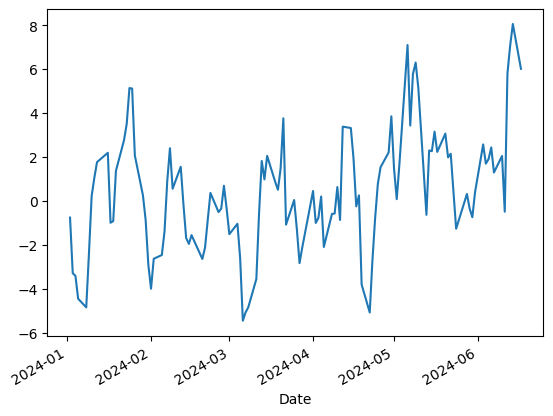

In [68]:
df5['predicted return difference compared with today'].plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


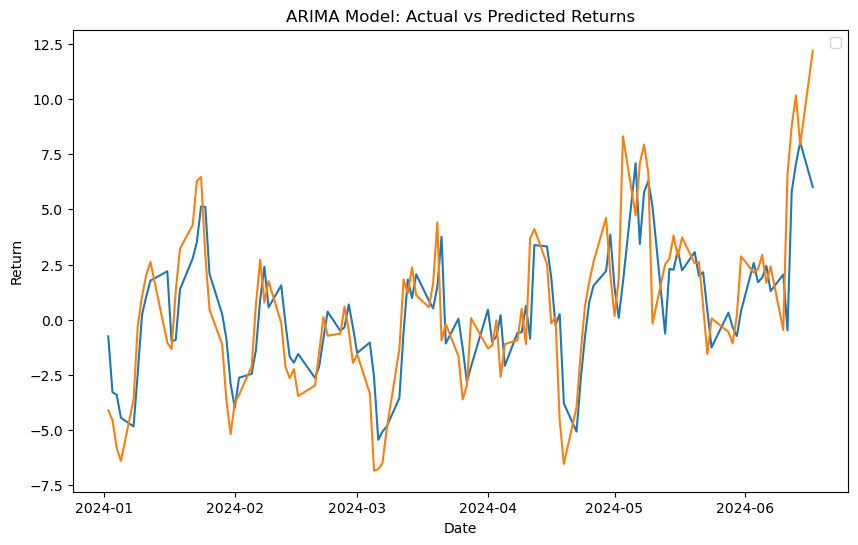

In [69]:
plt.figure(figsize = (10,6))

plt.plot(df5['predicted return difference compared with today'])
plt.plot(test['5-Day Return'])
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('ARIMA Model: Actual vs Predicted Returns')
plt.legend()
plt.show()

In [73]:
# 1 month return 
model21 = ARIMA(train['1-Month Return'], order=(1, 0, 0))
model21_fit = model21.fit()
print(model21_fit.summary())

c:\Users\12436\.conda\envs\Capstones\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\12436\.conda\envs\Capstones\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\12436\.conda\envs\Capstones\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         1-Month Return   No. Observations:                 3501
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -8150.158
Date:                Tue, 18 Jun 2024   AIC                          16306.315
Time:                        13:12:31   BIC                          16324.798
Sample:                             0   HQIC                         16312.911
                               - 3501                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3405      0.835      2.802      0.005       0.704       3.977
ar.L1          0.9500      0.004    211.139      0.000       0.941       0.959
sigma2         6.1556      0.096     64.315      0.0

In [74]:
history = [x for x in train['1-Month Return']] # Make the history as a list 
predictions = list()      # Make the prediction also as a list 

for t in range(len(test)):      # for every new point, we make a decision based on the available history 
    model = ARIMA(history, order=(1, 0, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test['1-Month Return'][t]
    history.append(obs)
    print(f'finish {t} round, {len(test)-t} left')

finish 0 round, 116 left
finish 1 round, 115 left
finish 2 round, 114 left
finish 3 round, 113 left
finish 4 round, 112 left
finish 5 round, 111 left
finish 6 round, 110 left
finish 7 round, 109 left
finish 8 round, 108 left
finish 9 round, 107 left
finish 10 round, 106 left
finish 11 round, 105 left
finish 12 round, 104 left
finish 13 round, 103 left
finish 14 round, 102 left
finish 15 round, 101 left
finish 16 round, 100 left
finish 17 round, 99 left
finish 18 round, 98 left
finish 19 round, 97 left
finish 20 round, 96 left
finish 21 round, 95 left
finish 22 round, 94 left
finish 23 round, 93 left
finish 24 round, 92 left
finish 25 round, 91 left
finish 26 round, 90 left
finish 27 round, 89 left
finish 28 round, 88 left
finish 29 round, 87 left
finish 30 round, 86 left
finish 31 round, 85 left
finish 32 round, 84 left
finish 33 round, 83 left
finish 34 round, 82 left
finish 35 round, 81 left
finish 36 round, 80 left
finish 37 round, 79 left
finish 38 round, 78 left
finish 39 round, 7

In [75]:
df21 = pd.DataFrame(data=predictions, index=test.index, columns=['predicted return difference compared with today'])

<Axes: xlabel='Date'>

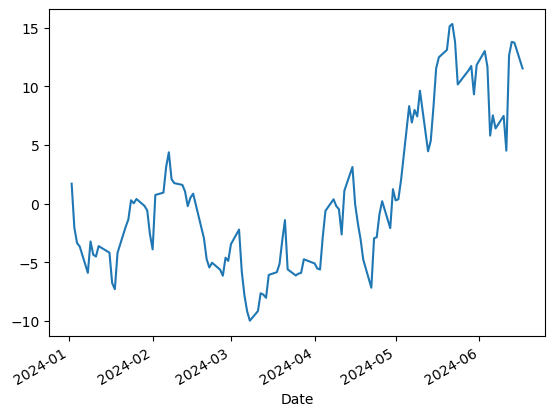

In [76]:
df21['predicted return difference compared with today'].plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


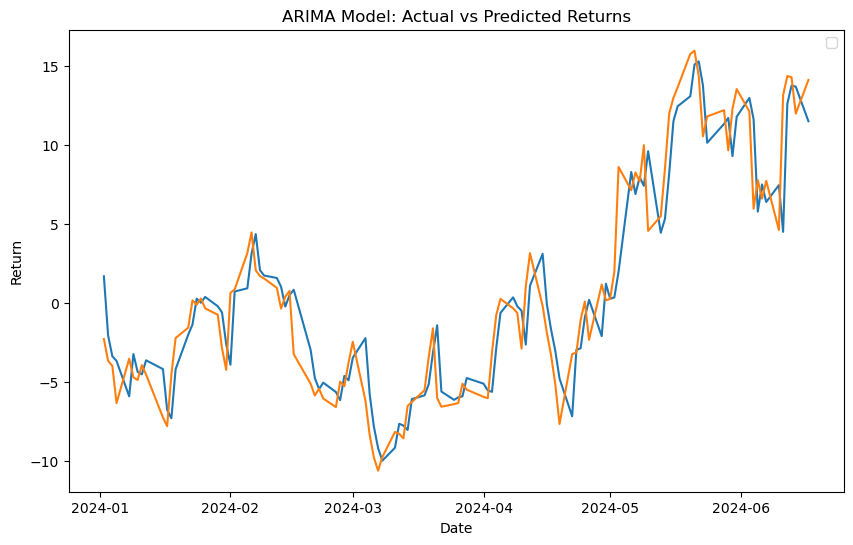

In [77]:
plt.figure(figsize = (10,6))

plt.plot(df21['predicted return difference compared with today'])
plt.plot(test['1-Month Return'])
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('ARIMA Model: Actual vs Predicted Returns')
plt.legend()
plt.show()